In [268]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics, tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [269]:
# Read dataset
df = pd.read_csv("Data/1_lebron_james_shot_chart_1_2023.csv")
# df = pd.read_csv("Data/2_james_harden_shot_chart_2023.csv")
# df = pd.read_csv("Data/3_stephen_curry_shot_chart_2023.csv")

In [270]:
print(f"Initial columns: {df.columns.tolist()}\n")

df["score_difference"] = df["lebron_team_score"] - df["opponent_team_score"]
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    # "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
    # "left",
    # "top",
    "shot_type",
]
df.drop(columns_to_drop, axis=1, inplace=True)

# df = df[df["shot_type"] == 2]

print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   top  left time_remaining  result  distance_ft  score_difference
0  310   203          09:26   False           26                 0
1  213   259          08:38   False           16                -1
2  143   171          08:10   False           11                -3
3   68   215          05:24    True            3                -7
4   66   470          01:02   False           23                -1


In [271]:
# convert time to numerical
minutes = df["time_remaining"].str.split(":", expand=True)[0].astype(int)
seconds = df["time_remaining"].str.split(":", expand=True)[1].astype(int)
df["time_remaining"] = minutes * 60 + seconds

print(f"Final head:\n{df.head()}")

Final head:
   top  left  time_remaining  result  distance_ft  score_difference
0  310   203             566   False           26                 0
1  213   259             518   False           16                -1
2  143   171             490   False           11                -3
3   68   215             324    True            3                -7
4   66   470              62   False           23                -1


In [272]:
layup_data = df[df["distance_ft"] <= 5]
midrange_data = df[(df["distance_ft"] > 5) & (df["distance_ft"] < 22)]
three_data = df[df["distance_ft"] >= 22]

# layup_data = layup_data.drop(columns=["distance_ft"])
# midrange_data = midrange_data.drop(columns=["distance_ft"])
# three_data = three_data.drop(columns=["distance_ft"])

print(f"Layup data:\n{layup_data.head()}")

print(f"\nLayup shape: {layup_data.shape}")
print(f"Midrange shape: {midrange_data.shape}")
print(f"Three shape: {three_data.shape}")


Layup data:
    top  left  time_remaining  result  distance_ft  score_difference
3    68   215             324    True            3                -7
5    63   239             690    True            1                -1
7    53   224             605    True            2                -1
10   62   224             426   False            2                -8
11   63   249             233    True            1               -10

Layup shape: (645, 6)
Midrange shape: (378, 6)
Three shape: (510, 6)


In [273]:
# Split data
layup_X = layup_data.drop(columns=["result"])
layup_y = layup_data.result.astype("int")
layup_X_train, layup_X_test, layup_y_train, layup_y_test = train_test_split(
    layup_X, layup_y, test_size=0.25, random_state=16
)

midrange_X = midrange_data.drop(columns=["result"])
midrange_y = midrange_data.result.astype("int")
midrange_X_train, midrange_X_test, midrange_y_train, midrange_y_test = train_test_split(
    midrange_X, midrange_y, test_size=0.25, random_state=16
)

three_X = three_data.drop(columns=["result"])
three_y = three_data.result.astype("int")
three_X_train, three_X_test, three_y_train, three_y_test = train_test_split(
    three_X, three_y, test_size=0.25, random_state=16
)

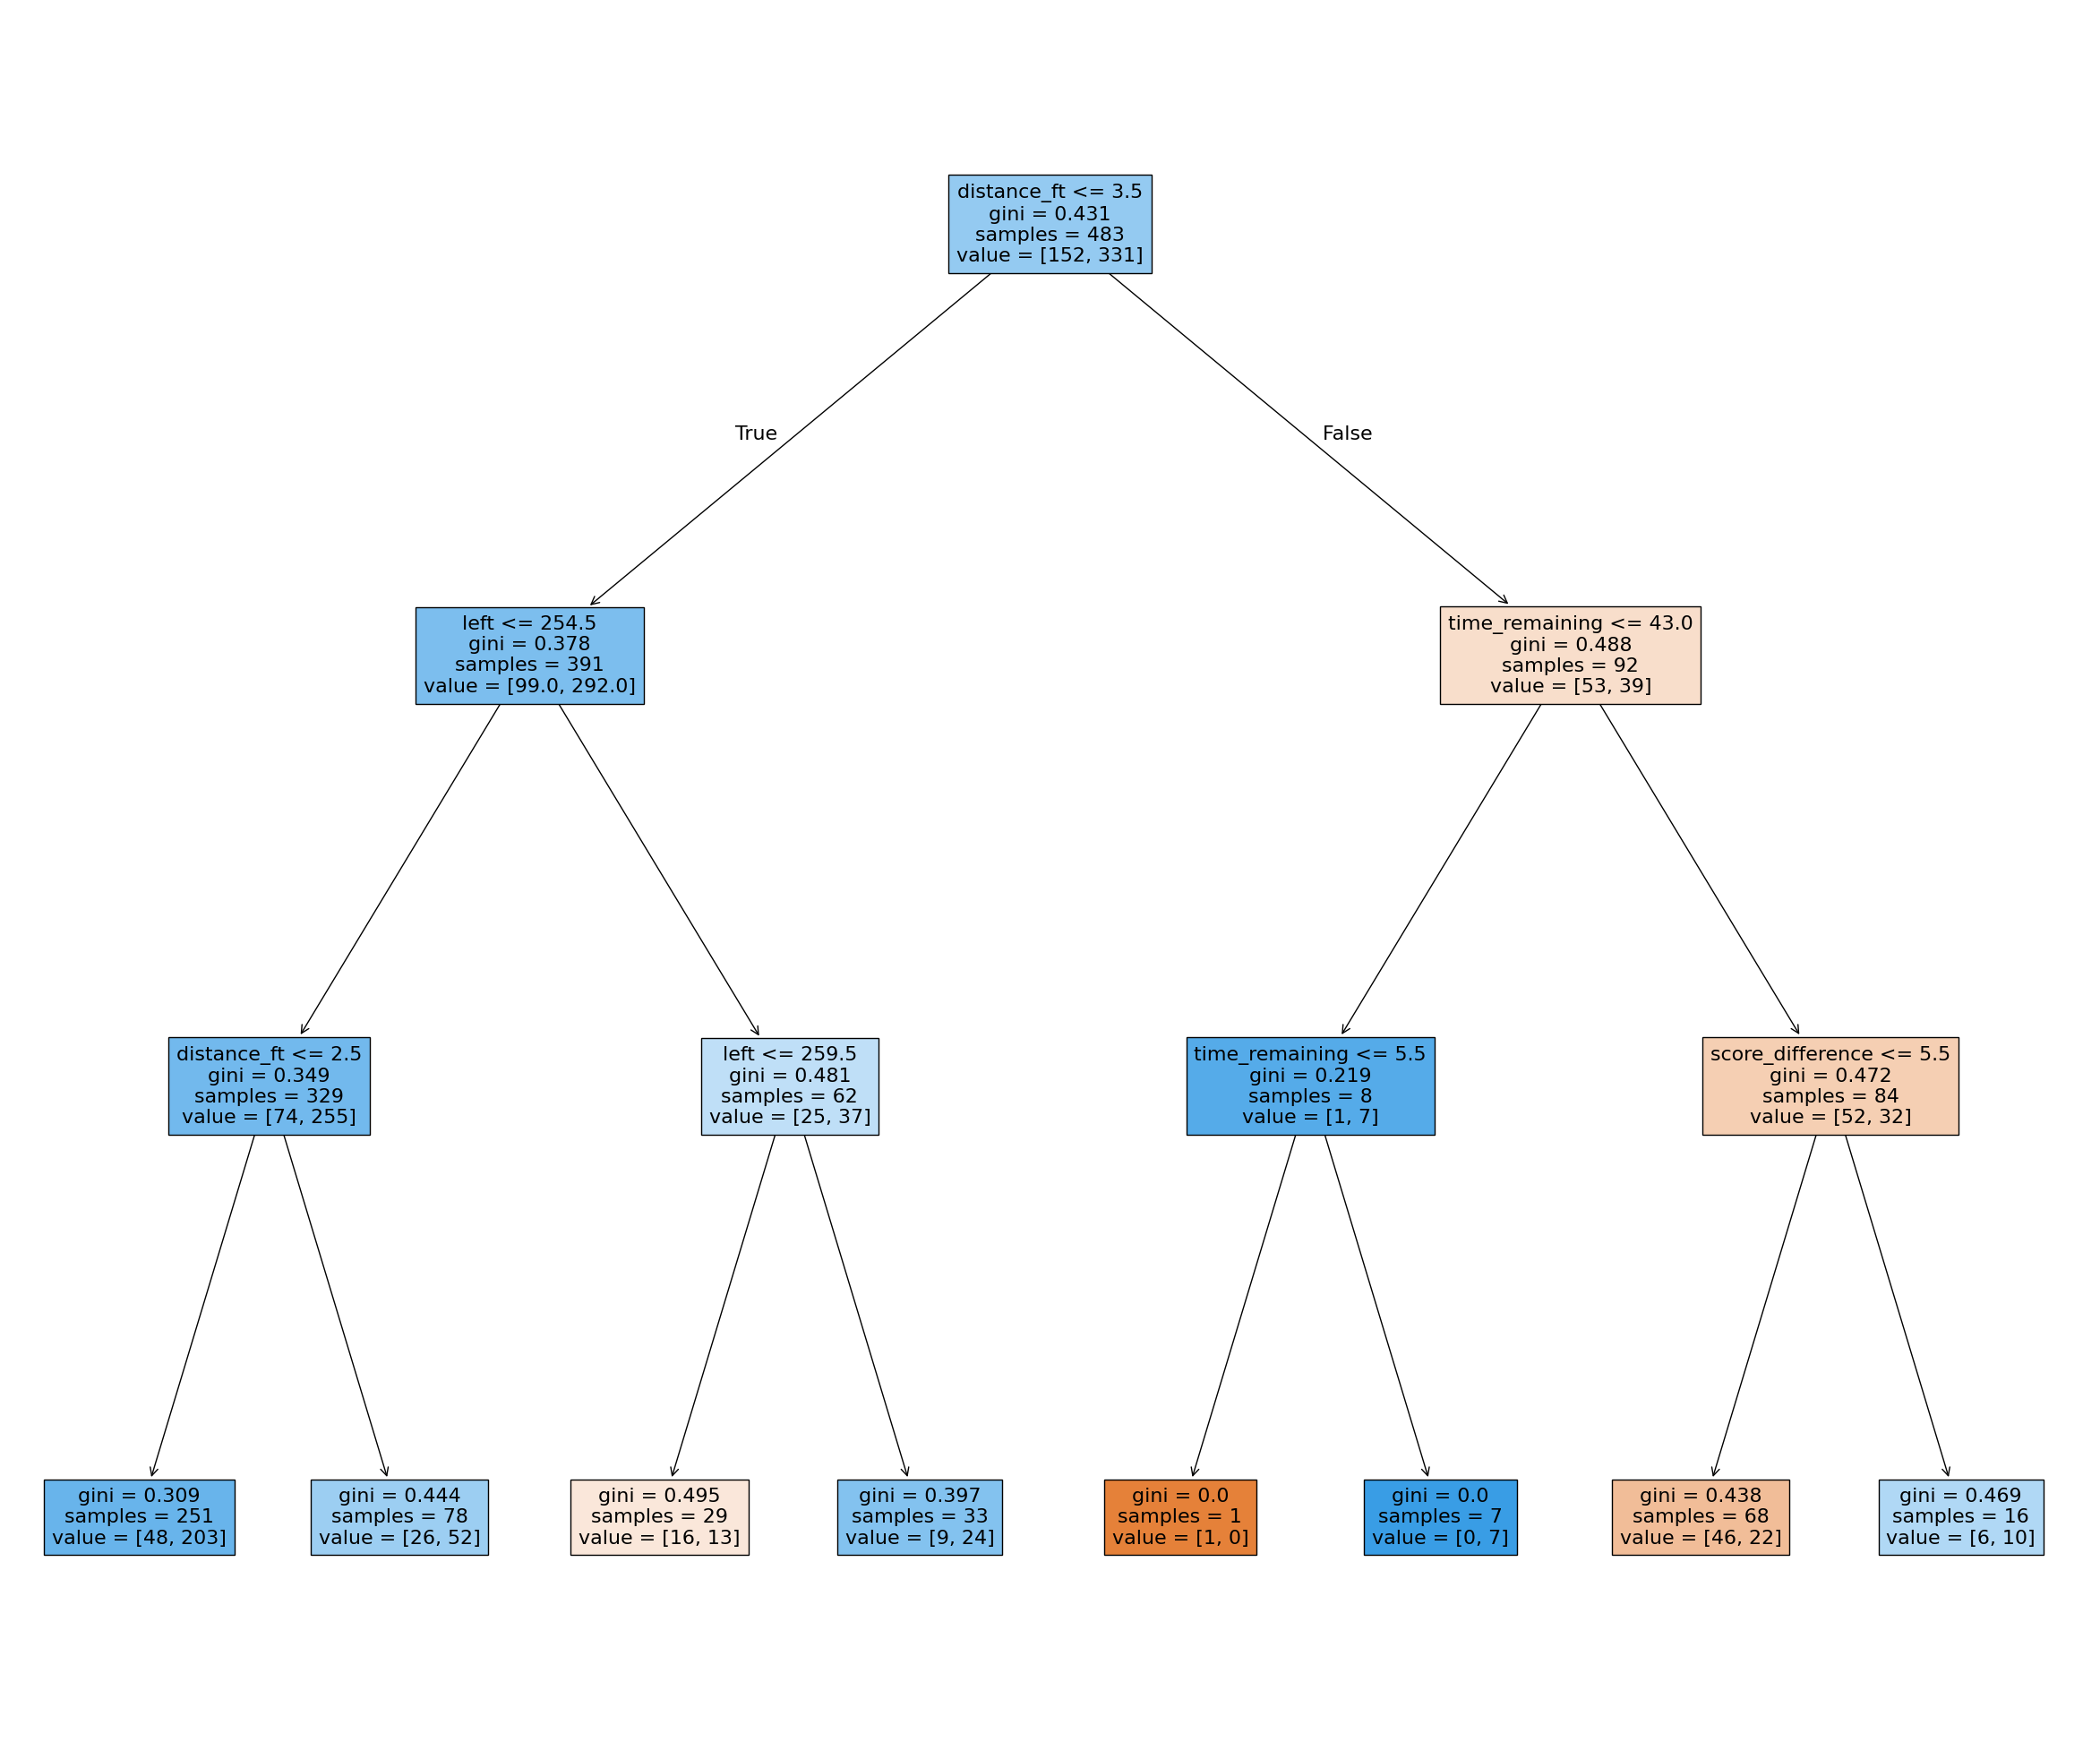

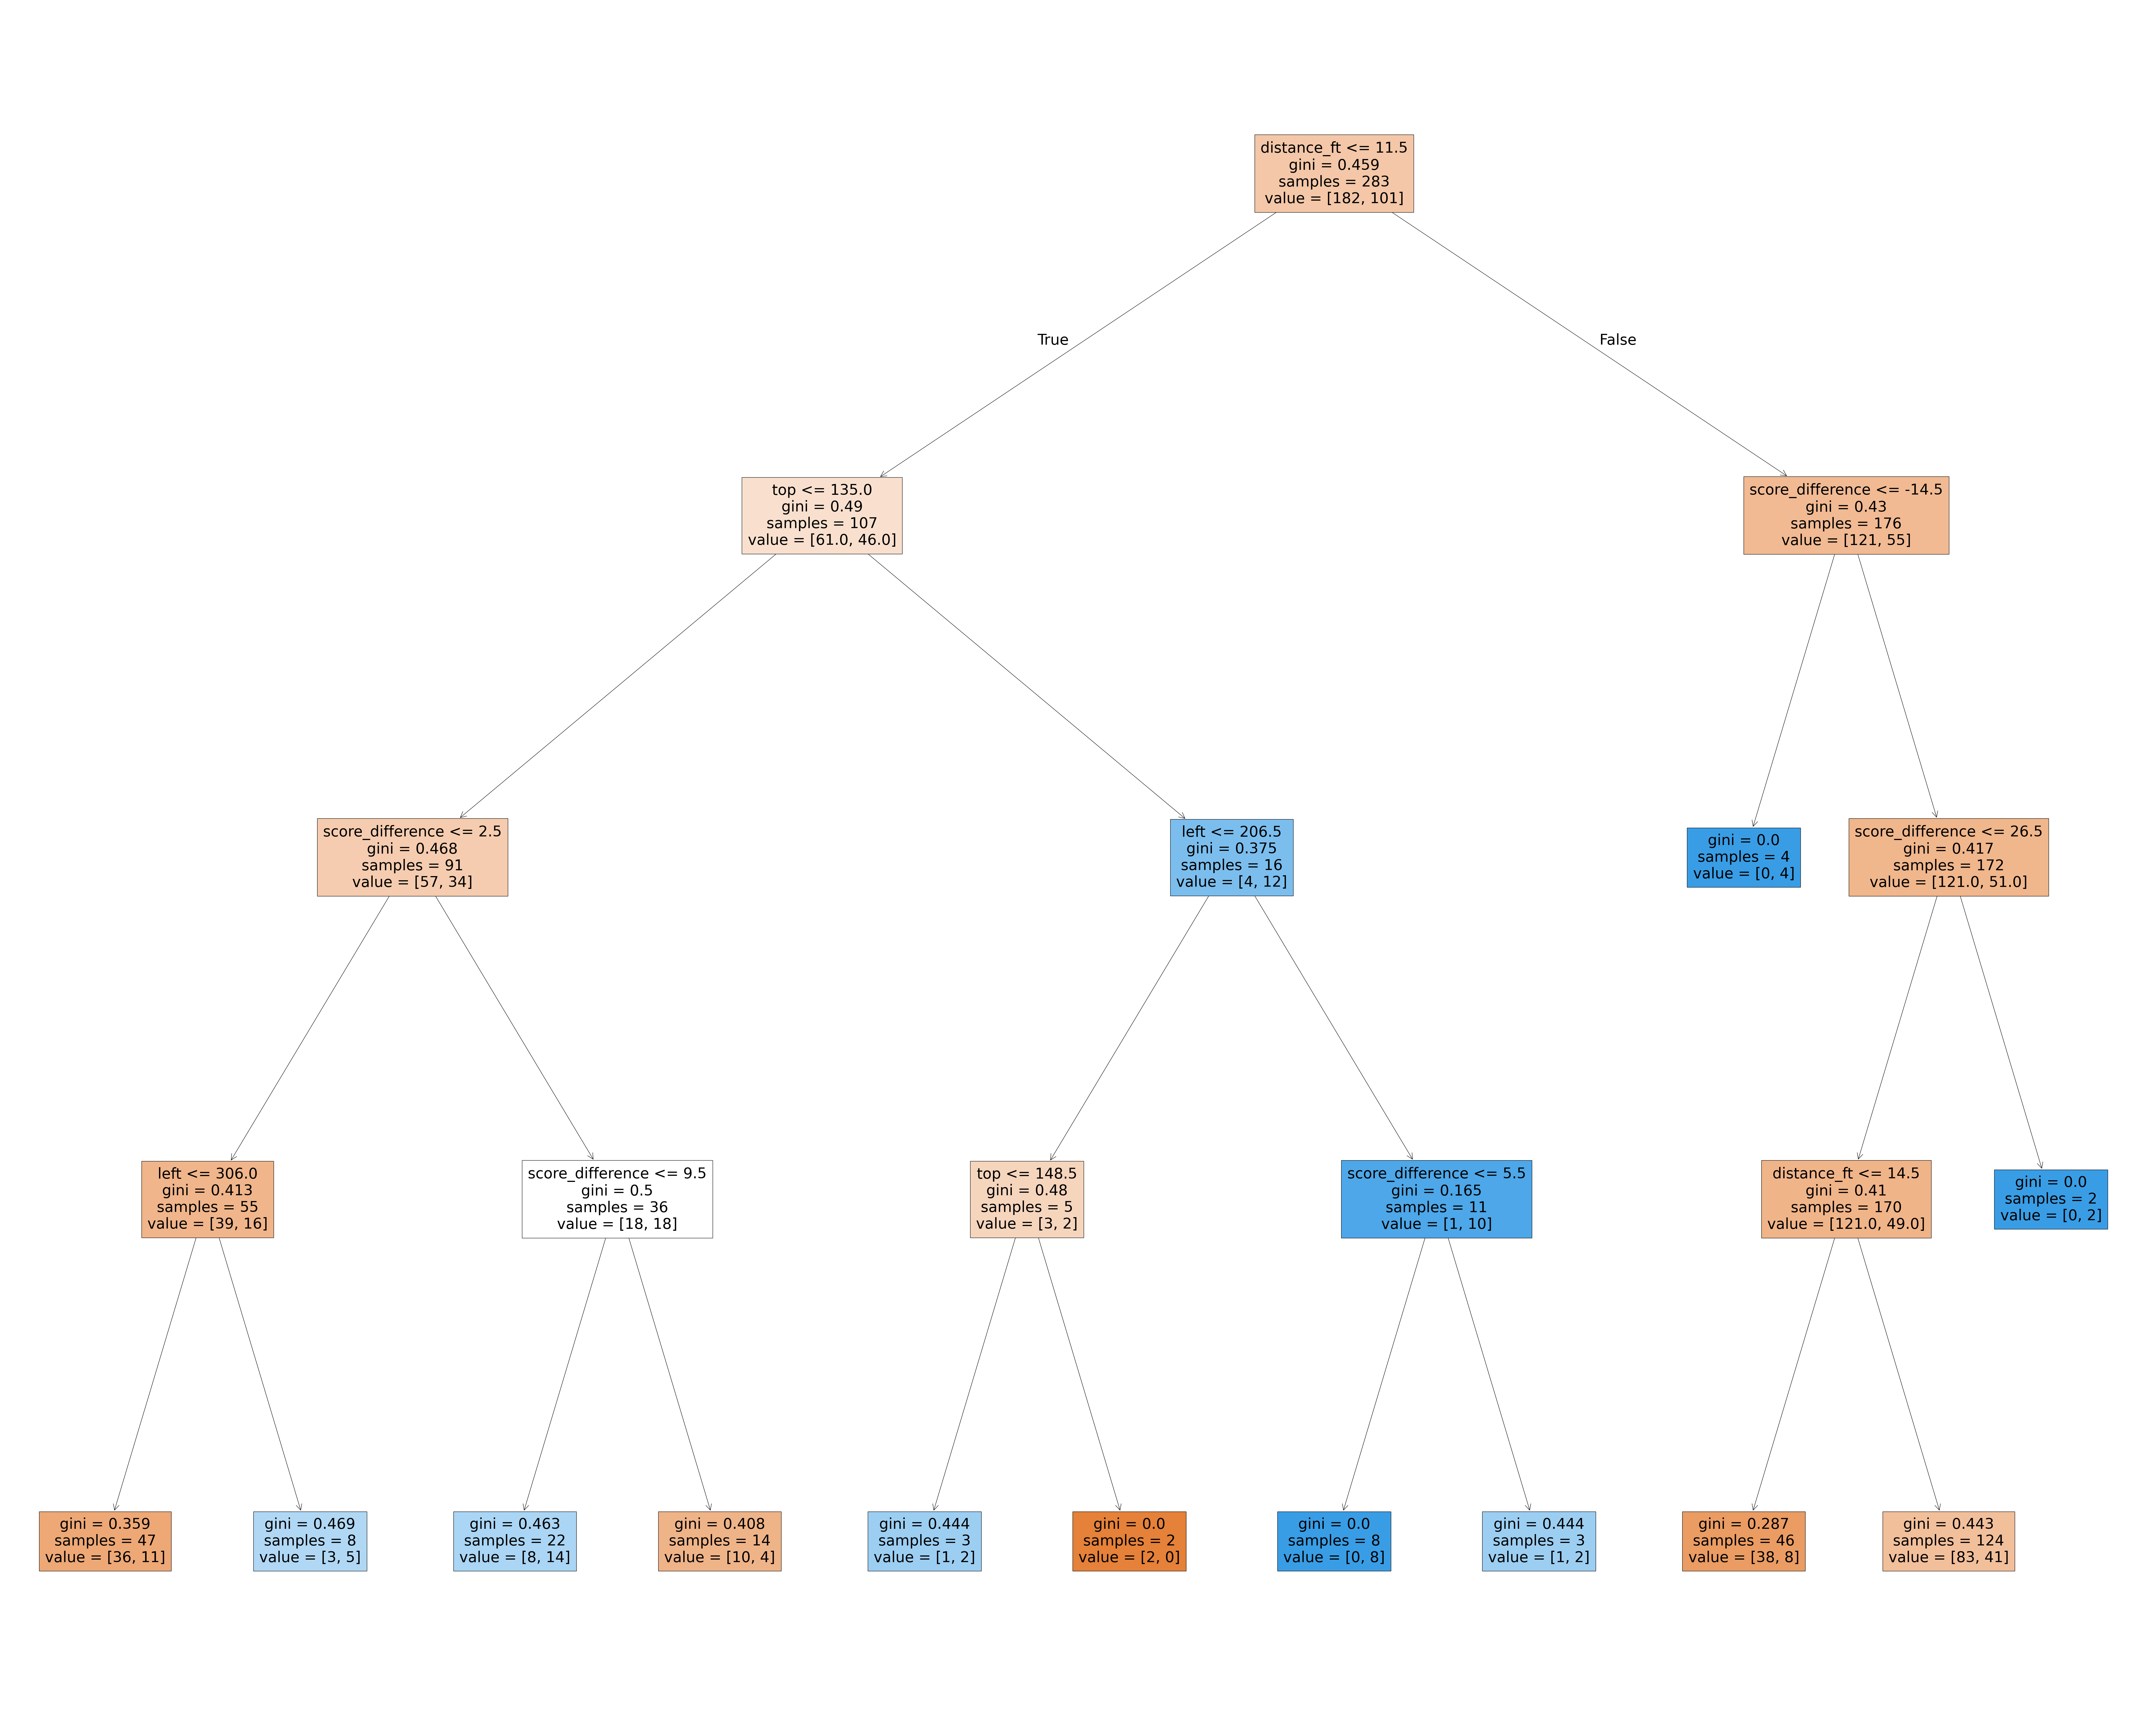

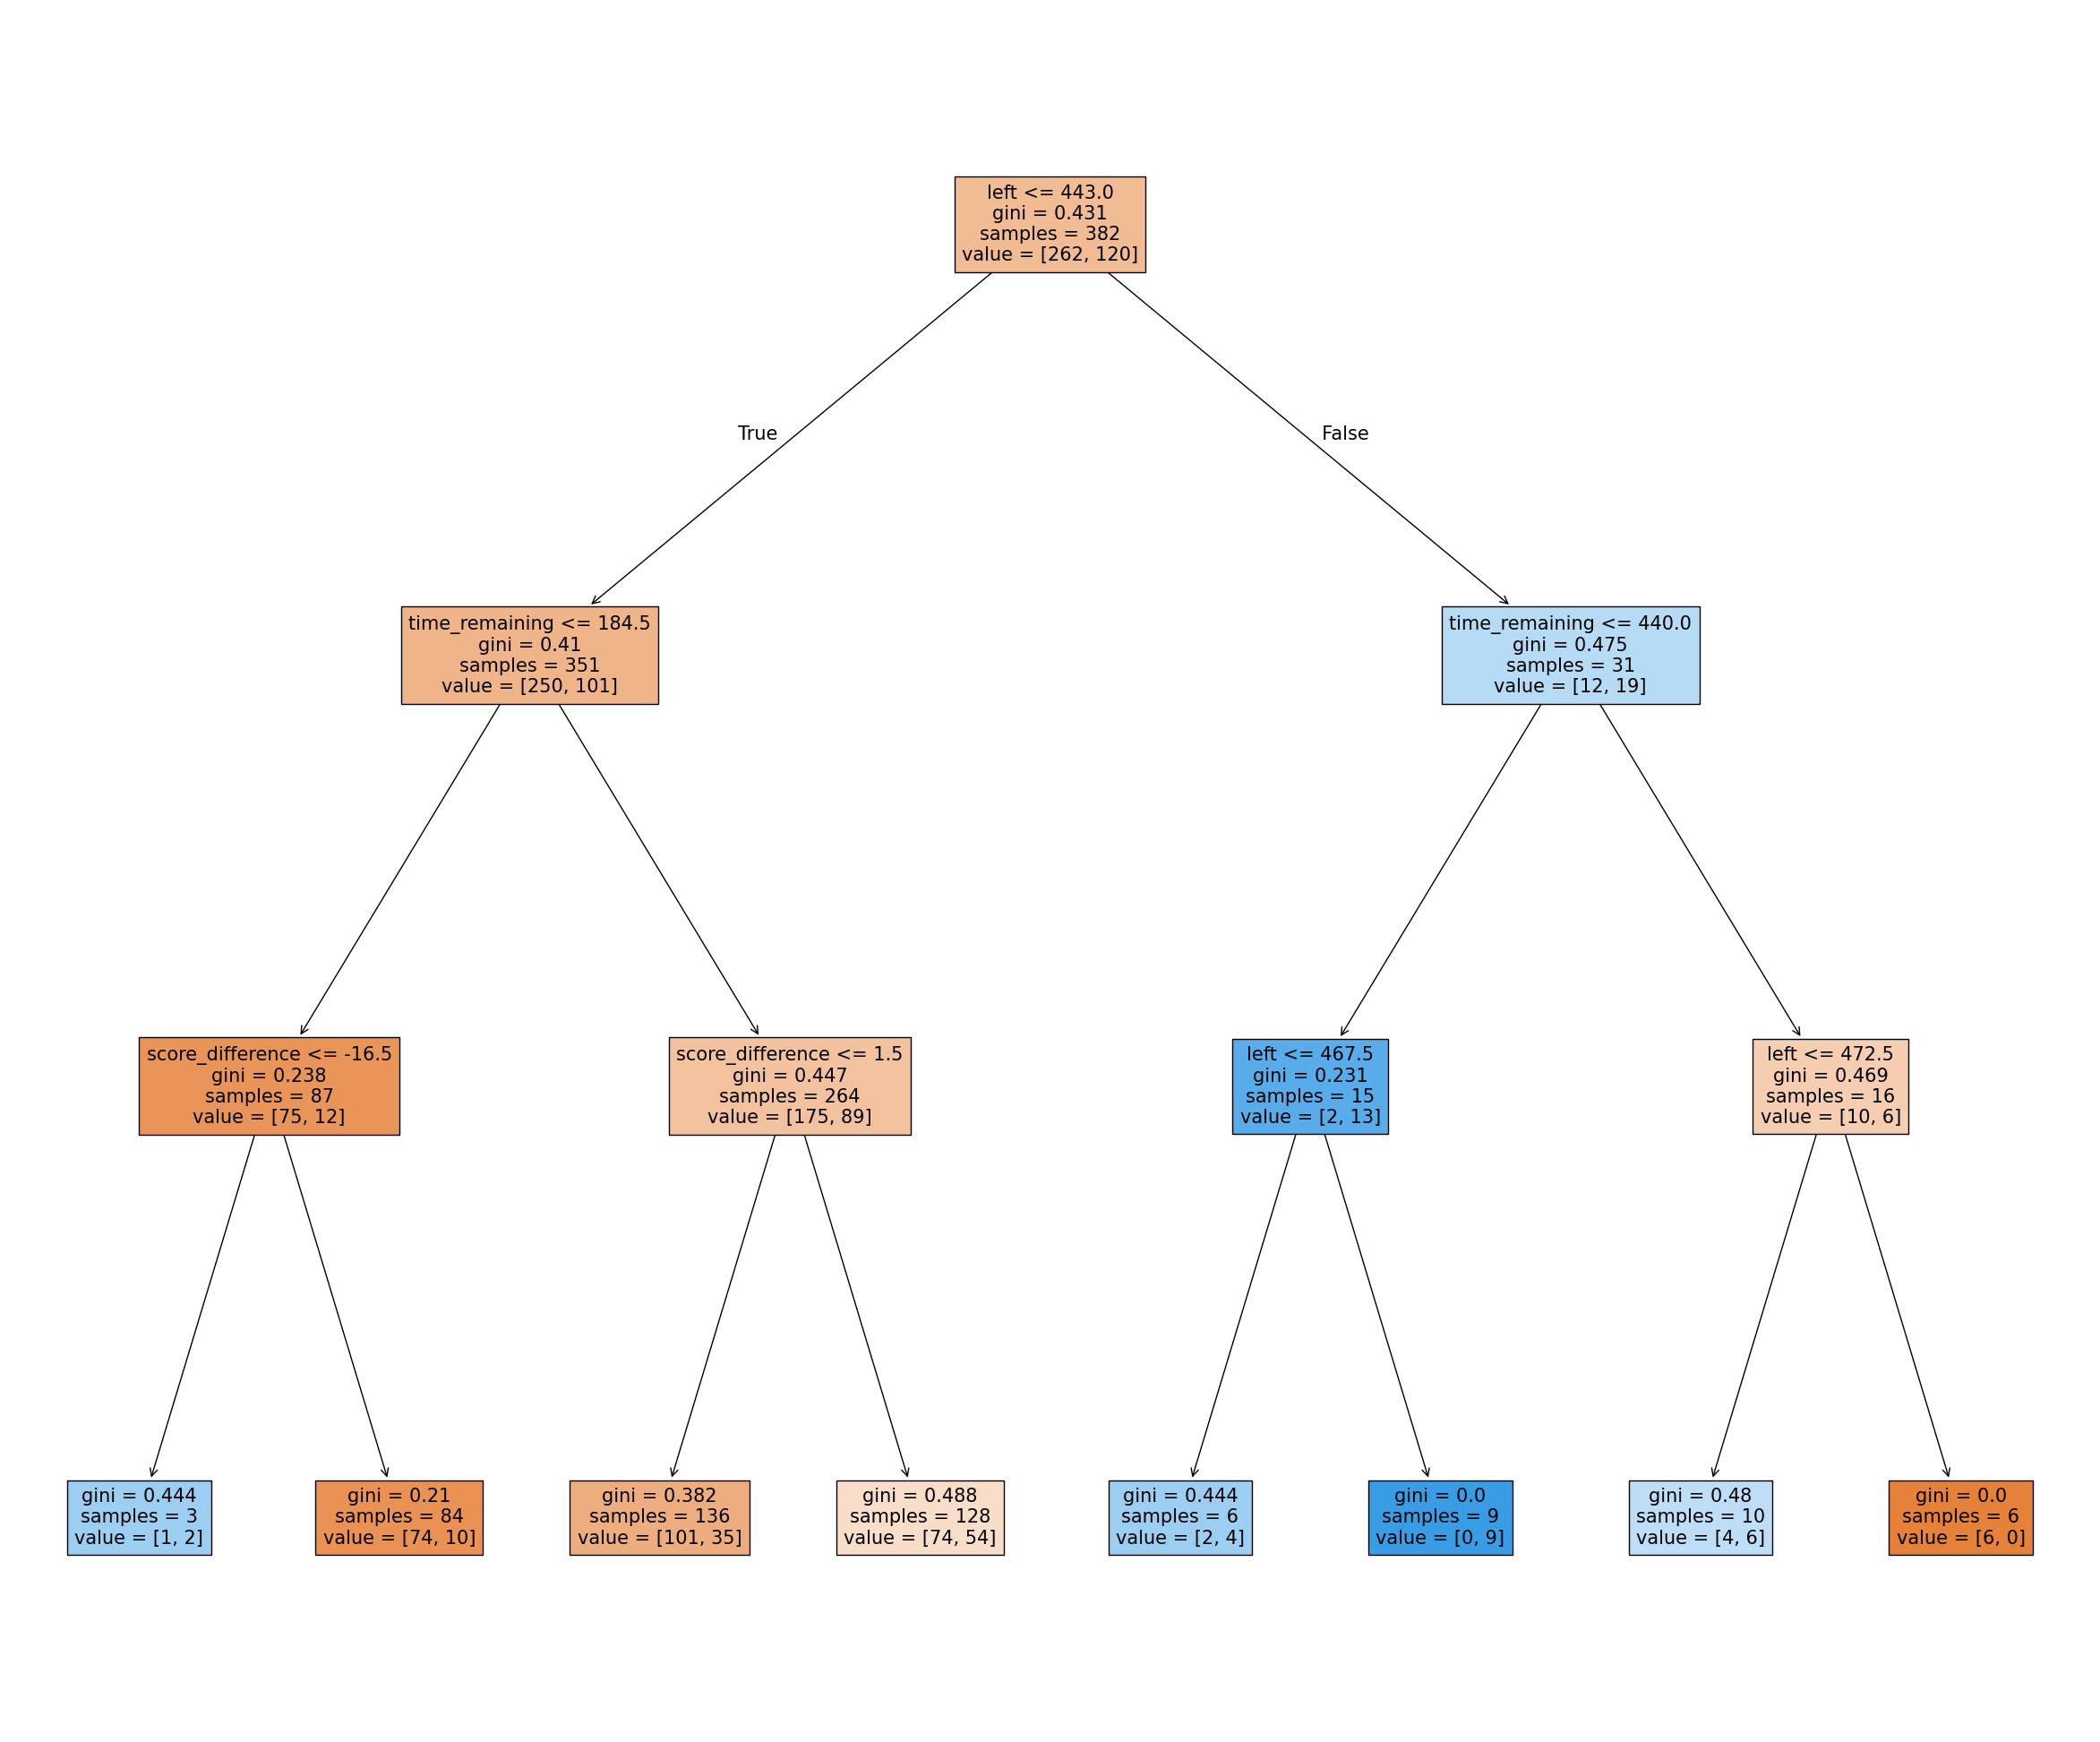

In [274]:
# Initialize and train the decision tree classifier
max_depth = 3

layup_clf = DecisionTreeClassifier(random_state=100, max_depth=max_depth)
layup_clf.fit(layup_X_train, layup_y_train)

midrange_clf = DecisionTreeClassifier(random_state=100, max_depth=4)
midrange_clf.fit(midrange_X_train, midrange_y_train)

three_clf = DecisionTreeClassifier(random_state=100, max_depth=max_depth)
three_clf.fit(three_X_train, three_y_train)

# Make predictions
layup_y_pred = layup_clf.predict(layup_X_test)
midrange_y_pred = midrange_clf.predict(midrange_X_test)
three_y_pred = three_clf.predict(three_X_test)

plt.figure(figsize=(30, 25))
tree.plot_tree(layup_clf, feature_names=layup_X.columns, filled=True)
plt.show()

plt.figure(figsize=(100, 80))
tree.plot_tree(midrange_clf, feature_names=layup_X.columns, filled=True)
plt.show()

plt.figure(figsize=(30, 25))
tree.plot_tree(three_clf, feature_names=layup_X.columns, filled=True)
plt.show()


Confusion matrix: [[ 12  23]
 [ 20 107]]


Text(0.5, 427.9555555555555, 'Predicted label')

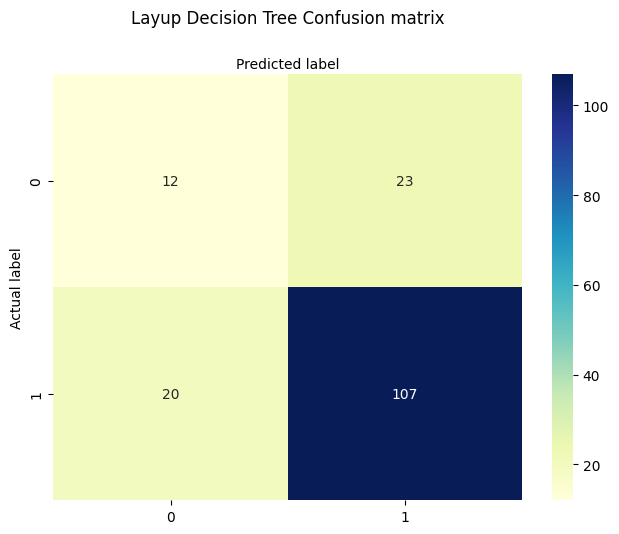

In [275]:
layup_cnf_matrix = metrics.confusion_matrix(layup_y_test, layup_y_pred)
print(f"Confusion matrix: {layup_cnf_matrix}")

class_names = layup_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(layup_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Layup Decision Tree Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion matrix: [[37 10]
 [37 11]]


Text(0.5, 427.9555555555555, 'Predicted label')

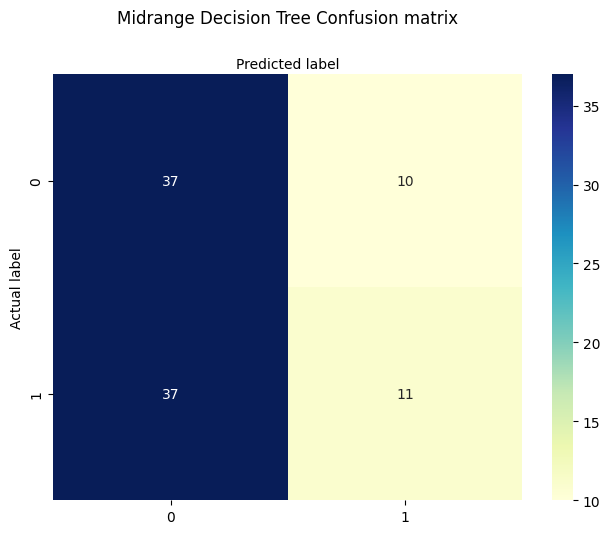

In [276]:
midrange_cnf_matrix = metrics.confusion_matrix(midrange_y_test, midrange_y_pred)
print(f"Confusion matrix: {midrange_cnf_matrix}")

class_names = midrange_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(midrange_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Midrange Decision Tree Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion matrix: [[81  6]
 [37  4]]


Text(0.5, 427.9555555555555, 'Predicted label')

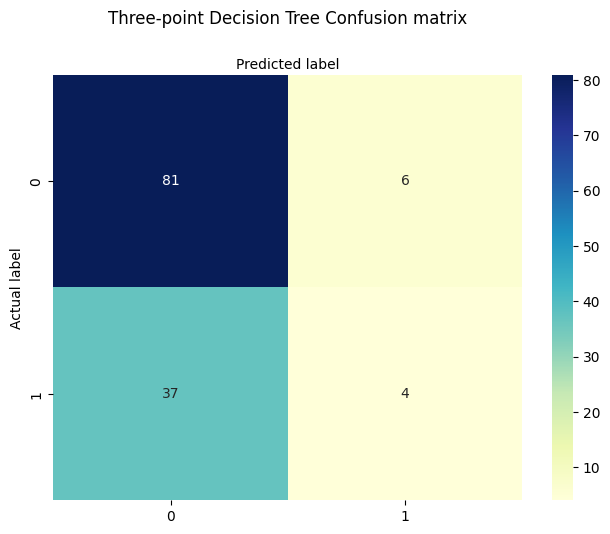

In [277]:
three_cnf_matrix = metrics.confusion_matrix(three_y_test, three_y_pred)
print(f"Confusion matrix: {three_cnf_matrix}")

class_names = three_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(three_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Three-point Decision Tree Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [278]:
# Evaluate the model
print("Accuracy:", accuracy_score(layup_y_test, layup_y_pred))
print("\nClassification Report:\n", classification_report(layup_y_test, layup_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(layup_y_test, layup_y_pred))

Accuracy: 0.7345679012345679

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.34      0.36        35
           1       0.82      0.84      0.83       127

    accuracy                           0.73       162
   macro avg       0.60      0.59      0.60       162
weighted avg       0.73      0.73      0.73       162


Confusion Matrix:
 [[ 12  23]
 [ 20 107]]


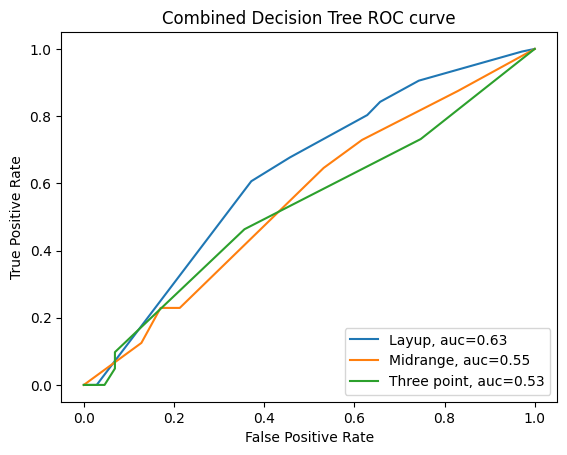

In [279]:
# ROC curve
layup_y_pred_proba = layup_clf.predict_proba(layup_X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(layup_y_test, layup_y_pred_proba)
auc = metrics.roc_auc_score(layup_y_test, layup_y_pred_proba)
# plt.figure(dpi=200, figsize=(10, 10))
plt.plot(fpr, tpr, label="Layup, auc=" + str(round(auc, 2)))
# plt.legend(loc=4)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Layup ROC curve")
# plt.show()

# ROC curve
midrange_y_pred_proba = midrange_clf.predict_proba(midrange_X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(midrange_y_test, midrange_y_pred_proba)
auc = metrics.roc_auc_score(midrange_y_test, midrange_y_pred_proba)
plt.plot(fpr, tpr, label="Midrange, auc=" + str(round(auc, 2)))
# plt.legend(loc=4)
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("Midrange ROC curve")
# plt.show()

# ROC curve
three_y_pred_proba = three_clf.predict_proba(three_X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(three_y_test, three_y_pred_proba)
auc = metrics.roc_auc_score(three_y_test, three_y_pred_proba)
plt.plot(fpr, tpr, label="Three point, auc=" + str(round(auc, 2)))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined Decision Tree ROC curve")
plt.show()

# Max Depth Impact on ROC

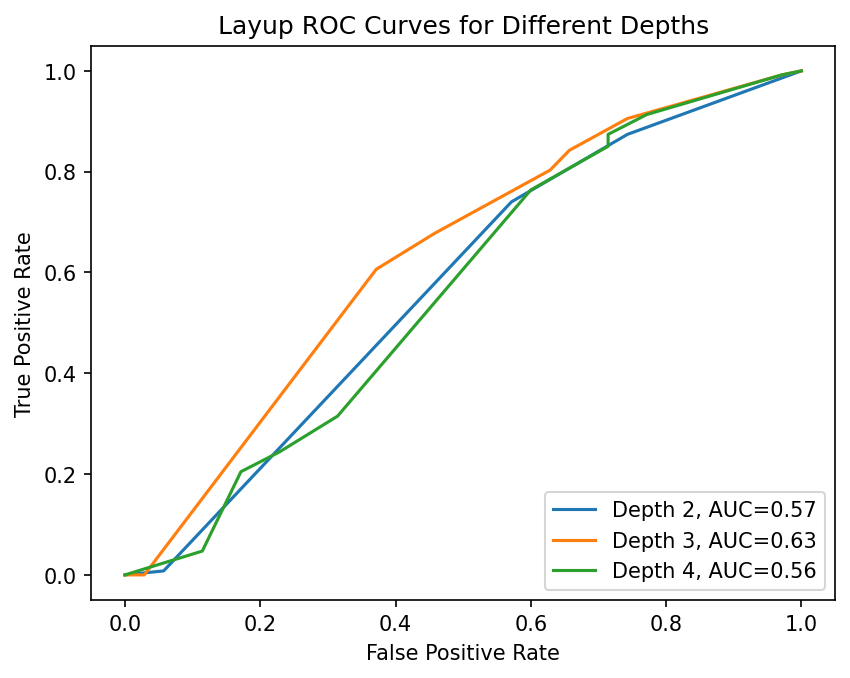

In [280]:
layup_clf_3 = DecisionTreeClassifier(random_state=100, max_depth=3)
layup_clf_3.fit(layup_X_train, layup_y_train)

layup_clf_4 = DecisionTreeClassifier(random_state=100, max_depth=4)
layup_clf_4.fit(layup_X_train, layup_y_train)

layup_clf_2 = DecisionTreeClassifier(random_state=100, max_depth=2)
layup_clf_2.fit(layup_X_train, layup_y_train)

plt.figure(dpi=150)

# max_depth=2
layup_y_pred_proba_2 = layup_clf_2.predict_proba(layup_X_test)[:, 1]
fpr_2, tpr_2, _ = metrics.roc_curve(layup_y_test, layup_y_pred_proba_2)
auc_2 = metrics.roc_auc_score(layup_y_test, layup_y_pred_proba_2)
plt.plot(fpr_2, tpr_2, label="Depth 2, AUC=" + str(round(auc_2, 2)))

# max_depth=3
layup_y_pred_proba_3 = layup_clf_3.predict_proba(layup_X_test)[:, 1]
fpr_3, tpr_3, _ = metrics.roc_curve(layup_y_test, layup_y_pred_proba_3)
auc_3 = metrics.roc_auc_score(layup_y_test, layup_y_pred_proba_3)
plt.plot(fpr_3, tpr_3, label="Depth 3, AUC=" + str(round(auc_3, 2)))

# max_depth=4
layup_y_pred_proba_4 = layup_clf_4.predict_proba(layup_X_test)[:, 1]
fpr_4, tpr_4, _ = metrics.roc_curve(layup_y_test, layup_y_pred_proba_4)
auc_4 = metrics.roc_auc_score(layup_y_test, layup_y_pred_proba_4)
plt.plot(fpr_4, tpr_4, label="Depth 4, AUC=" + str(round(auc_4, 2)))

plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Layup ROC Curves for Different Depths")
plt.show()

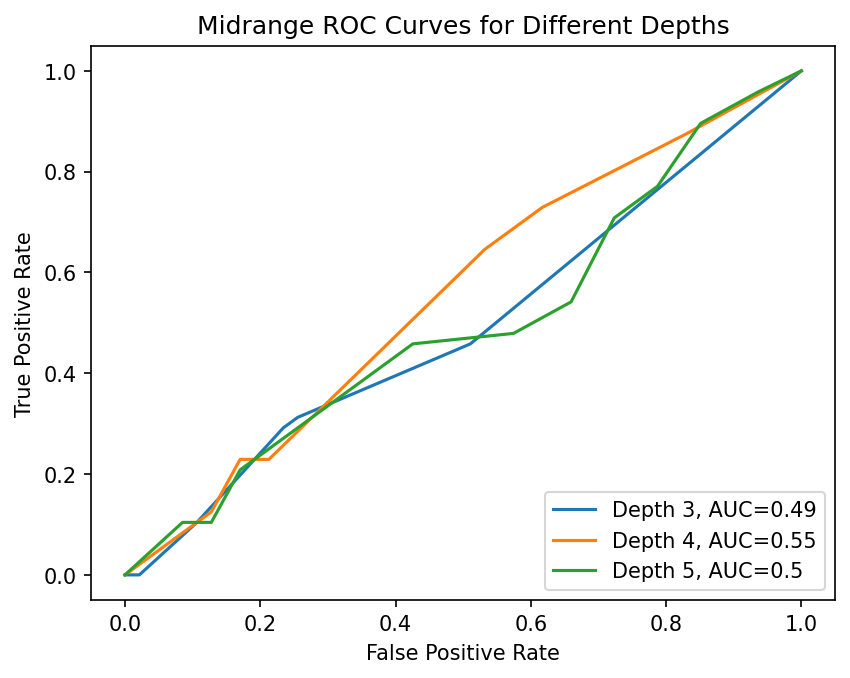

In [281]:
midrange_clf_3 = DecisionTreeClassifier(random_state=100, max_depth=3)
midrange_clf_3.fit(midrange_X_train, midrange_y_train)

midrange_clf_4 = DecisionTreeClassifier(random_state=100, max_depth=4)
midrange_clf_4.fit(midrange_X_train, midrange_y_train)

midrange_clf_5 = DecisionTreeClassifier(random_state=100, max_depth=5)
midrange_clf_5.fit(midrange_X_train, midrange_y_train)

plt.figure(dpi=150)

# Max depth 3
midrange_y_pred_proba_3 = midrange_clf_3.predict_proba(midrange_X_test)[:, 1]
fpr_3, tpr_3, _ = metrics.roc_curve(midrange_y_test, midrange_y_pred_proba_3)
auc_3 = metrics.roc_auc_score(midrange_y_test, midrange_y_pred_proba_3)
plt.plot(fpr_3, tpr_3, label="Depth 3, AUC=" + str(round(auc_3, 2)))

# Max depth 4
midrange_y_pred_proba_4 = midrange_clf_4.predict_proba(midrange_X_test)[:, 1]
fpr_4, tpr_4, _ = metrics.roc_curve(midrange_y_test, midrange_y_pred_proba_4)
auc_4 = metrics.roc_auc_score(midrange_y_test, midrange_y_pred_proba_4)
plt.plot(fpr_4, tpr_4, label="Depth 4, AUC=" + str(round(auc_4, 2)))

# Max depth 5
midrange_y_pred_proba_5 = midrange_clf_5.predict_proba(midrange_X_test)[:, 1]
fpr_5, tpr_5, _ = metrics.roc_curve(midrange_y_test, midrange_y_pred_proba_5)
auc_5 = metrics.roc_auc_score(midrange_y_test, midrange_y_pred_proba_5)
plt.plot(fpr_5, tpr_5, label="Depth 5, AUC=" + str(round(auc_5, 2)))

plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Midrange ROC Curves for Different Depths")
plt.show()

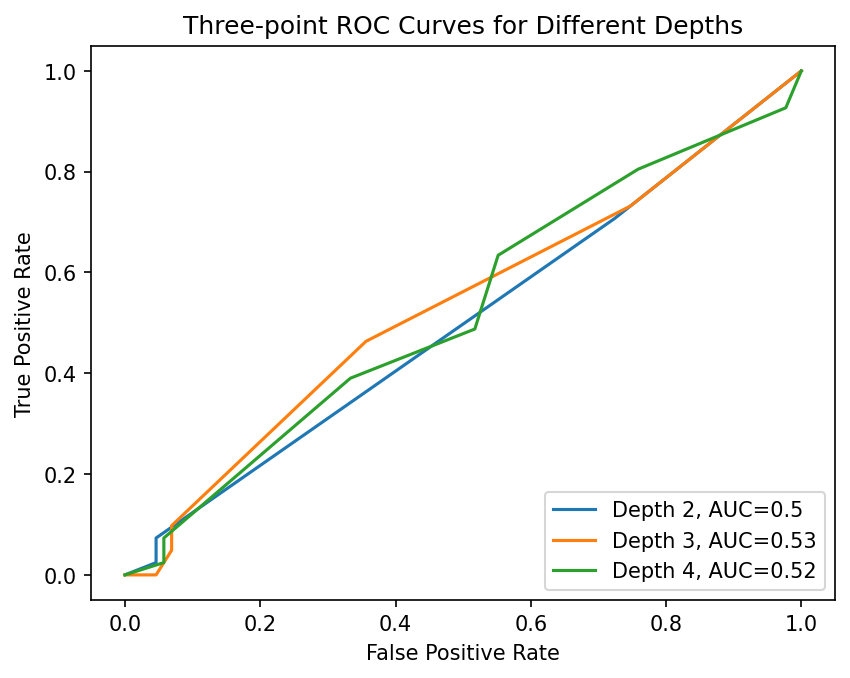

In [282]:
three_clf_2 = DecisionTreeClassifier(random_state=100, max_depth=2)
three_clf_2.fit(three_X_train, three_y_train)

three_clf_3 = DecisionTreeClassifier(random_state=100, max_depth=3)
three_clf_3.fit(three_X_train, three_y_train)

three_clf_4 = DecisionTreeClassifier(random_state=100, max_depth=4)
three_clf_4.fit(three_X_train, three_y_train)

plt.figure(dpi=150)

three_y_pred_proba_2 = three_clf_2.predict_proba(three_X_test)[:, 1]
fpr_2, tpr_2, _ = metrics.roc_curve(three_y_test, three_y_pred_proba_2)
auc_2 = metrics.roc_auc_score(three_y_test, three_y_pred_proba_2)
plt.plot(fpr_2, tpr_2, label="Depth 2, AUC=" + str(round(auc_2, 2)))

three_y_pred_proba_3 = three_clf_3.predict_proba(three_X_test)[:, 1]
fpr_3, tpr_3, _ = metrics.roc_curve(three_y_test, three_y_pred_proba_3)
auc_3 = metrics.roc_auc_score(three_y_test, three_y_pred_proba_3)
plt.plot(fpr_3, tpr_3, label="Depth 3, AUC=" + str(round(auc_3, 2)))

three_y_pred_proba_4 = three_clf_4.predict_proba(three_X_test)[:, 1]
fpr_4, tpr_4, _ = metrics.roc_curve(three_y_test, three_y_pred_proba_4)
auc_4 = metrics.roc_auc_score(three_y_test, three_y_pred_proba_4)
plt.plot(fpr_4, tpr_4, label="Depth 4, AUC=" + str(round(auc_4, 2)))

plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Three-point ROC Curves for Different Depths")
plt.show()